## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121
import warnings
warnings.simplefilter("ignore")
from PIL import Image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Dense,Dropout,Input,MaxPooling2D,ZeroPadding2D,Conv2D,Flatten

In [ ]:
import glob
import random
import base64
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO
from IPython.display import HTML


from sklearn import preprocessing
from sklearn.model_selection import train_test_split


import numpy as np
import os,cv2,random,time,shutil,csv
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from tqdm import tqdm
import json,os,cv2,keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import BatchNormalization,Dense,GlobalAveragePooling2D,Lambda,Dropout,InputLayer,Input
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.preprocessing.image import load_img


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [ ]:
import glob
import random
import base64
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from IPython.display import HTML


<font
      size="5">**Import Data**</font>

In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/competitions/dog-breed-identification/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vaarunaykaushal
Your Kaggle Key: ··········


100%|██████████| 691M/691M [00:18<00:00, 39.6MB/s]



Extracting archive ./dog-breed-identification/dog-breed-identification.zip to ./dog-breed-identification


In [ ]:
import os
Dir = '../content/dog-breed-identification'
os.listdir(Dir)

['labels.csv', 'test', 'sample_submission.csv', 'train']

In [ ]:
print(len(os.listdir('../content/dog-breed-identification/train')))

10222


In [ ]:
print(len(os.listdir('../content/dog-breed-identification/test')))

10357


In [ ]:
labels_df = pd.read_csv('../content/dog-breed-identification/labels.csv')
labels_df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

# Exploratory Analysis

In [ ]:
Breed_num= pd.unique(labels_df['breed'])
print(len(Breed_num))

120


<font
      size="4">**Images per Breed**</font>

In [ ]:
each_label = labels_df.groupby("breed").count()
each_label = each_label.rename(columns = {"id" : "count"})
each_label = each_label.sort_values("count", ascending=False)
each_label

count
breed                      
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
...                     ...
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66

[120 rows x 1 columns]

## Plotting the Breed VS Image count Distribution

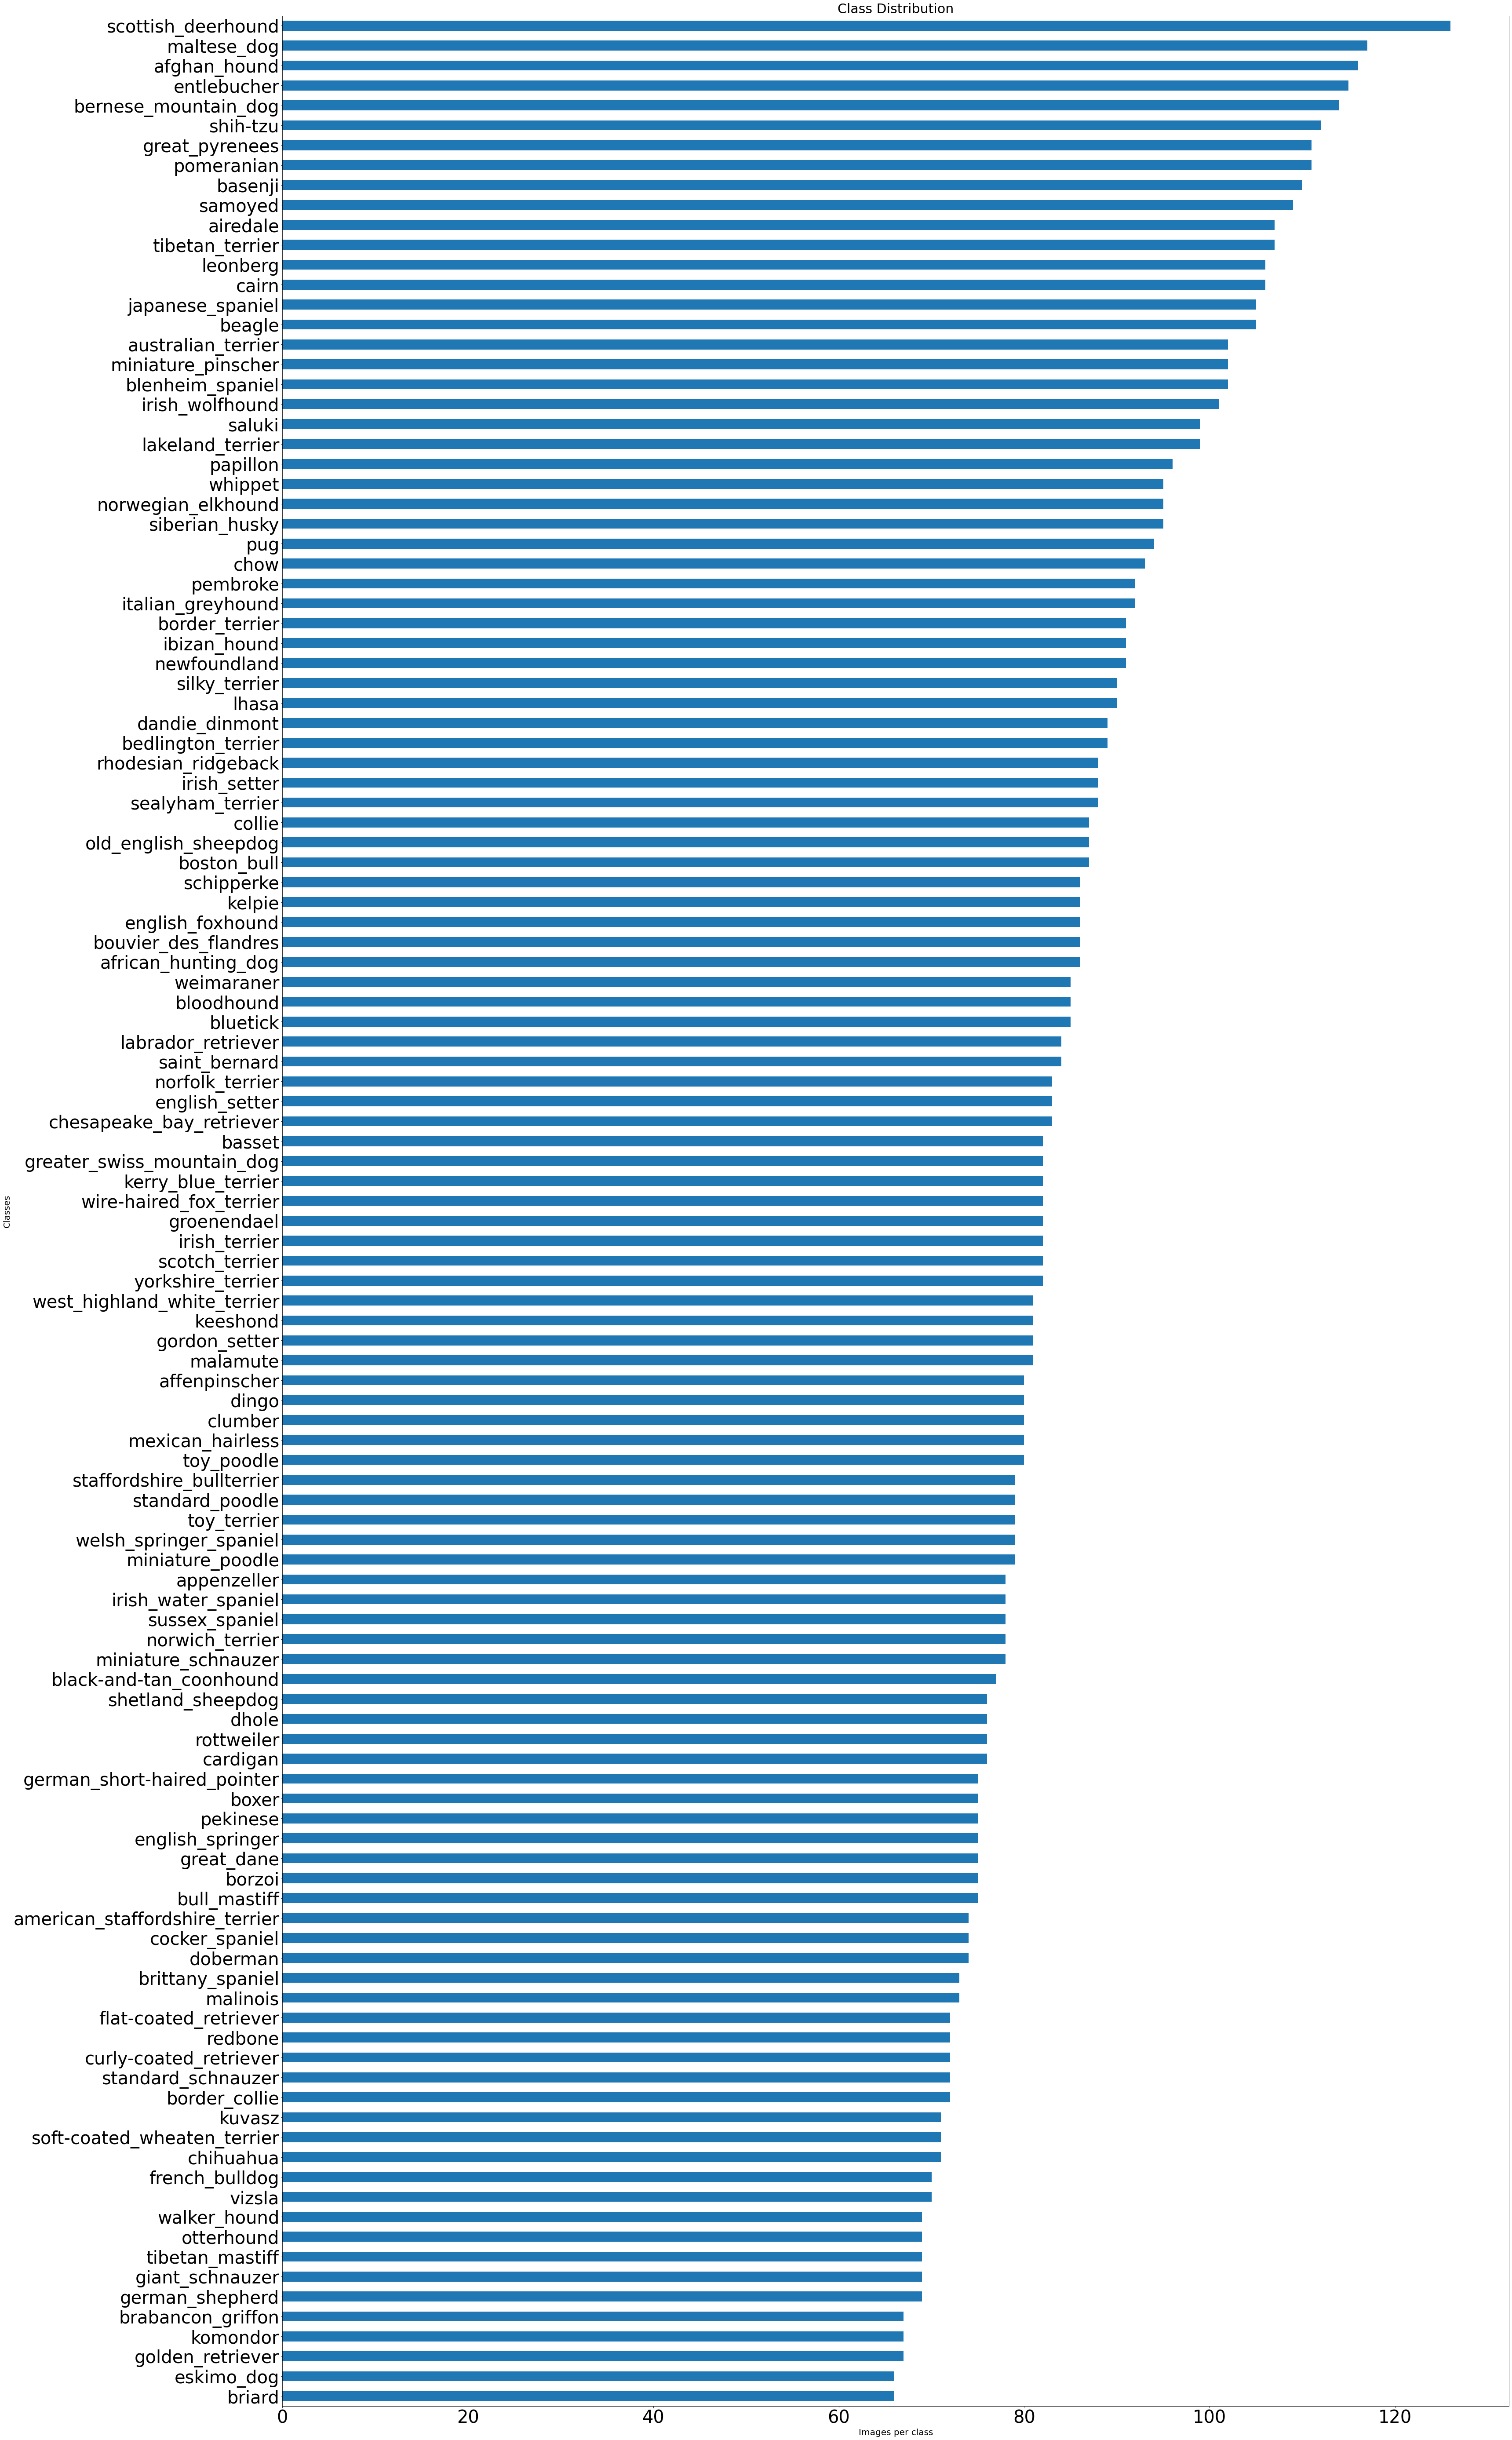

In [ ]:
ax=pd.value_counts(labels_df['breed'],ascending=True).plot(kind='barh',
                                                       fontsize="40",
                                                       title="Class Distribution",
                                                       figsize=(50,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(30)

In [ ]:
np.round((labels_df['breed'].value_counts()/len(labels_df['breed']))*100, 2)

scottish_deerhound      1.23
maltese_dog             1.14
afghan_hound            1.13
entlebucher             1.13
bernese_mountain_dog    1.12
                        ... 
golden_retriever        0.66
brabancon_griffon       0.66
komondor                0.66
eskimo_dog              0.65
briard                  0.65
Name: breed, Length: 120, dtype: float64

In [ ]:
len(labels_df)

10222

In [ ]:
# paths
path = r'../input/'
labels_csv_path = path + 'labels.csv'
sample_submission_csv_path = path + 'sample_submission.csv'
submission_csv_path =  '../content/sample_submission.csv'
train_path = path + 'train'
test_path = path + 'test'

number_of_epochs = 10

print(f'Constants are set. Fine tuning takes {number_of_epochs} epochs.')


Constants are set. Fine tuning takes 10 epochs.


## Loading a Single Image

In [ ]:
pd.set_option('display.max_colwidth', -1)

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

In [ ]:
id='../content/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg'
dogs = pd.read_csv('../content/dog-breed-identification/labels.csv')
dogs = dogs.sample(20)
dogs['file'] = dogs.id.map(lambda id: f'../content/dog-breed-identification/train/{id}.jpg')
dogs['image'] = dogs.file.map(lambda f: get_thumbnail(f))
dogs.head()

id              breed  \
3685  5bf7dc9255185907260436bb10d6ff42  lakeland_terrier    
270   065452ccfffdc6b6f60183bd6c88ba89  lakeland_terrier    
7548  bd53e2ce5f76dee81d7c6879521ae8cc  gordon_setter       
9577  f056ee6bc913fba2697dabf37c1c8531  schipperke          
1545  2637cc0c82e54086454cd271e2dcb61a  italian_greyhound   

                                                                                file  \
3685  ../content/dog-breed-identification/train/5bf7dc9255185907260436bb10d6ff42.jpg   
270   ../content/dog-breed-identification/train/065452ccfffdc6b6f60183bd6c88ba89.jpg   
7548  ../content/dog-breed-identification/train/bd53e2ce5f76dee81d7c6879521ae8cc.jpg   
9577  ../content/dog-breed-identification/train/f056ee6bc913fba2697dabf37c1c8531.jpg   
1545  ../content/dog-breed-identification/train/2637cc0c82e54086454cd271e2dcb61a.jpg   

                                                                                  image  
3685  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=112x150 at 0x7FF615DC5DD0>  
270   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=112x150 at 0x7FF615CCEC90>  
7548  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=99x150 at 0x7FF6162C6910>   
9577  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=100x150 at 0x7FF615CC9A90>  
1545  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=112x150 at 0x7FF615CC9BD0>


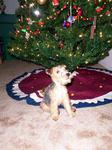
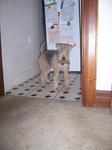
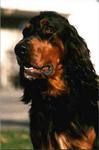
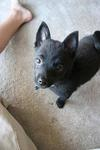
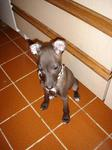
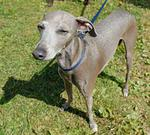
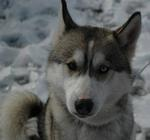
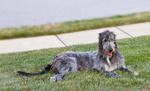
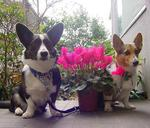
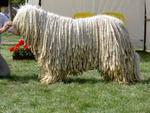
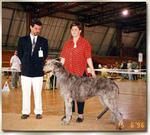
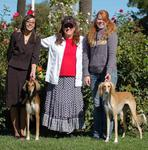
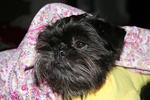
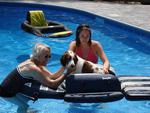
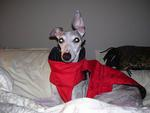
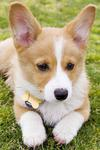
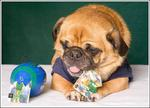
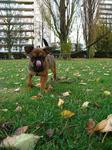
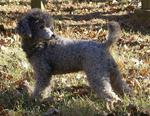
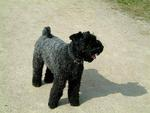

In [ ]:
HTML(dogs[['breed', 'image']].to_html(formatters={'image': image_formatter}, escape=False))

In [ ]:
def plot_examples(category = 'scottish_deerhound'):
    """ Plot 5 images of a given category """
    
    fig, axs = plt.subplots(1, 5, figsize=(25, 20))
    fig.subplots_adjust(hspace = .1, wspace=.1)
    axs = axs.ravel()
    temp = labels_df[labels_df['breed']==category].copy()
    temp.index = range(len(temp.index))
    for i in range(5):
        id_ = temp.loc[i, 'id']
        breed = temp.loc[i, 'breed']
        file = id_+'.jpg'
        img = cv2.imread('../content/dog-breed-identification/train/'+file)
        axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[i].set_title(breed)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
    plt.show()
    

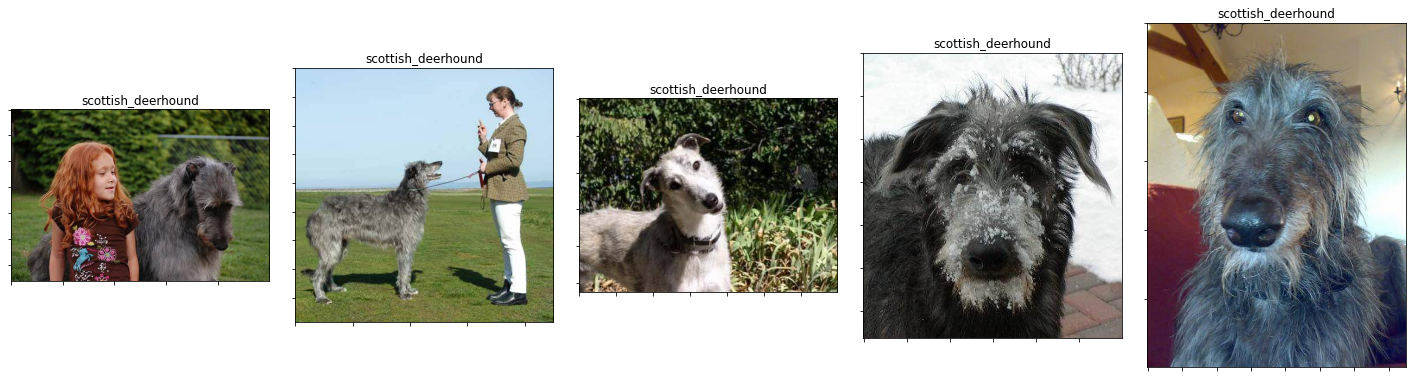

In [ ]:
plot_examples()

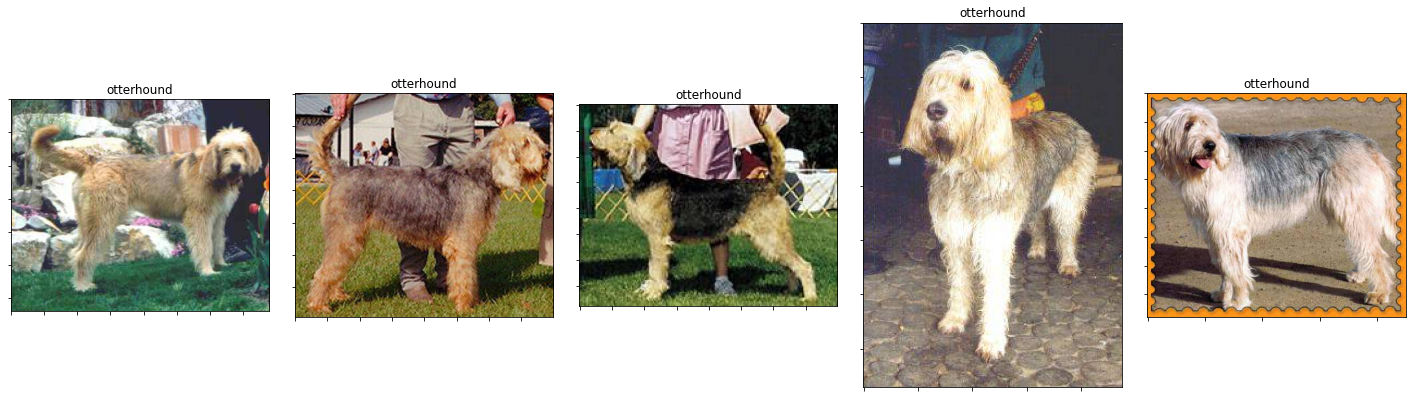

In [ ]:
plot_examples('otterhound')

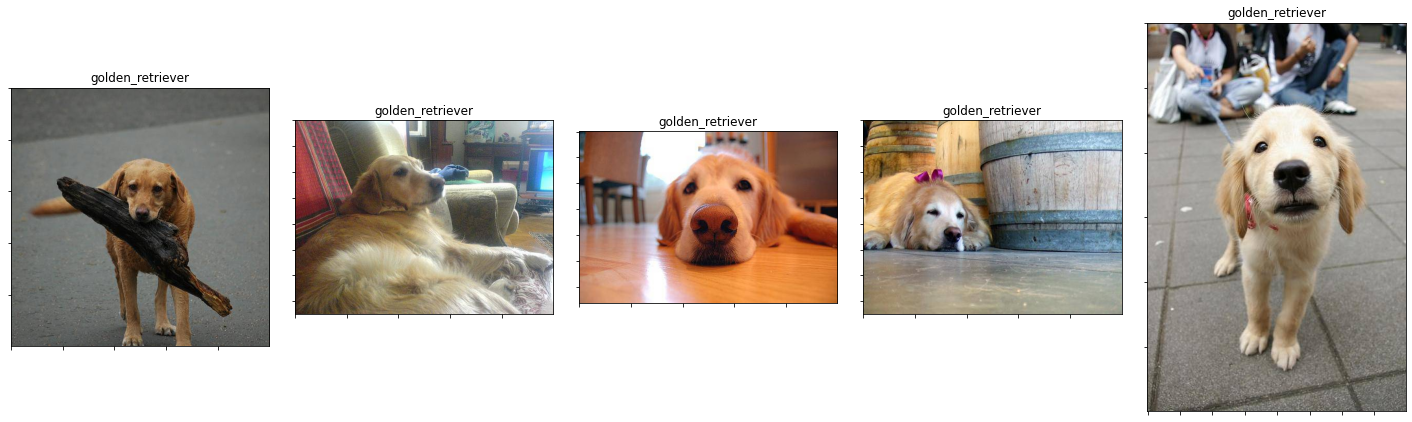

In [ ]:
plot_examples('golden_retriever')

## Label Encoding

In [ ]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
labels_df['breed_label']= label_encoder.fit_transform(labels_df['breed'])
  
labels_df['breed_label'].unique()

array([ 19,  37,  85,  15,  49,  10,  18,   7,  97,  99, 113,  73,  79,
         2, 118,  89,  68,  21,  38,  83, 106,  58,  12,  26,   0,  67,
        55,  40, 114,  48,  54,  36, 110,  17, 109,  80, 100,  57,  66,
        46,  53,   8,   6,  95,  90,  56,   5,  14,  94,  77,  24,  63,
        84,  16,  42,  33,  71, 115,  29,  93,  88,  72,  65,   3,  69,
        74,  25,  11,   4,  70,  27,  60,  31,  96,   1,  82,  92,  75,
        43,  59,  22, 111,  30,  44,  81, 103, 104,  39,  50, 101,  78,
        23,  28,  35,  52,   9, 112, 116,  64, 117,  98, 105,  62,  61,
        76,  87,  34, 119,  86,  51,  13, 102, 107,  47,  45,  20, 108,
        41,  32,  91])

In [ ]:
labels_df[labels_df['breed']=='dingo'].head()

id  breed  breed_label
1    001513dfcb2ffafc82cccf4d8bbaba97  dingo  37         
24   00a338a92e4e7bf543340dc849230e75  dingo  37         
43   0120343862761d052d6a7ade81625c94  dingo  37         
113  02b1c50fb7315423a664f3ce68c94e30  dingo  37         
258  060b163b5ad74c889c47b9f421825cdb  dingo  37

# Image Preprocessing

In [ ]:
def image_preprocessing(image, image_size):
    """ Image Preprocessing """

    # Load Image
    readFlag=cv2.COLOR_BGR2GRAY
    #image = np.asarray(bytearray(resp.read()), dtype="uint8")
    #image = cv2.imdecode(image, readFlag)
    image_gray = cv2.cvtColor(image, readFlag)
    
    # Crop Image
    mid_row = int(image_gray.shape[0]/2)
    mid_col = int(image_gray.shape[1]/2)
    if image_gray.shape[0]>image_gray.shape[1]:
        image_cropped = image_gray[mid_row-mid_col:mid_row+mid_col,
                                   0:image_gray.shape[1]]
    else:
        image_cropped = image_gray[0:image_gray.shape[0],
                                   mid_col-mid_row:mid_col+mid_row]
    
    # Rescale Image
    image_rescale = cv2.resize(image_cropped,
                               dsize=(image_size, image_size),
                               interpolation=cv2.INTER_AREA)
    return image_rescale

def plot_befor_after(image):
    """ Compare original and prepared image """
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    fig.subplots_adjust(hspace = .1, wspace=.1)
    axs = axs.ravel()
    # Plot Original Image
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title('original shape: '+str(image.shape))
    # Image Preprocessing
    image_rescale = image_preprocessing(image, image_size)
    # Plot Prepared Image
    axs[1].imshow(image_rescale, cmap='gray')
    axs[1].set_title('rescaled shape: '+str(image_rescale.shape))
    for i in range(2):
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
    plt.show()

In [ ]:
image_size = 128

Shape: (375, 500, 3)


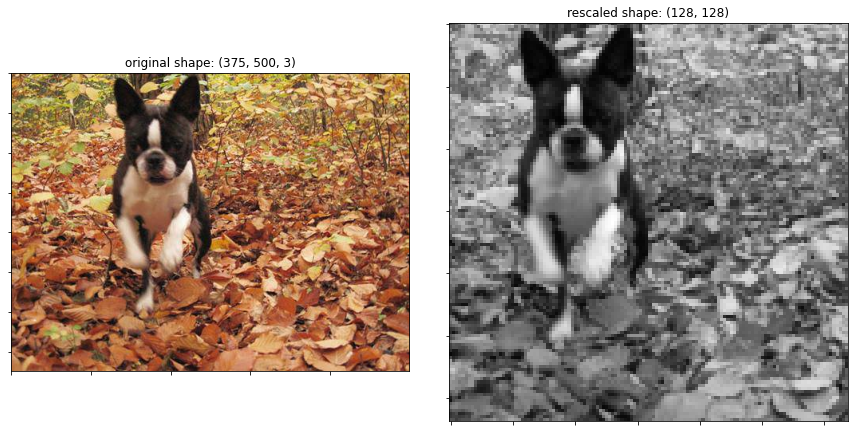

In [ ]:
row = 0
id_ = labels_df.loc[row, 'id']
breed = labels_df.loc[row, 'breed']
file = id_+'.jpg'
image = cv2.imread('../content/dog-breed-identification/train/'+file)
print('Shape:', image.shape)
plot_befor_after(image)

Shape: (299, 500, 3)


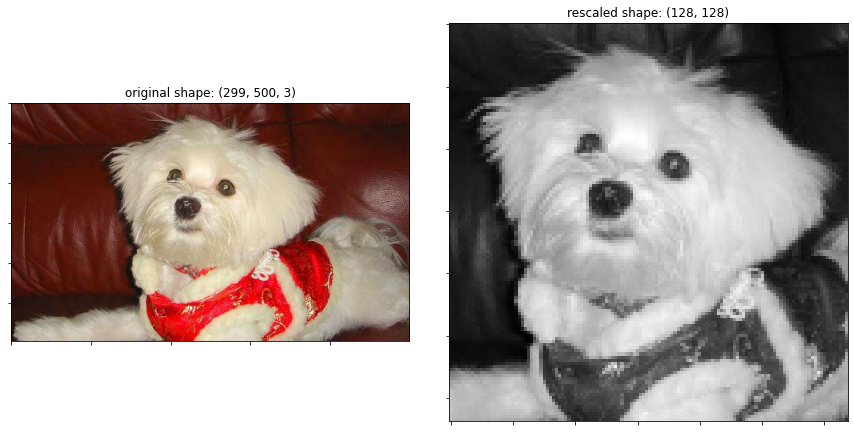

In [ ]:
row = 12
id_ = labels_df.loc[row, 'id']
breed = labels_df.loc[row, 'breed']
file = id_+'.jpg'
image = cv2.imread('../content/dog-breed-identification/train/'+file)
print('Shape:', image.shape)
plot_befor_after(image)

# Read all Images

In [ ]:
def prepare_data(path, data, image_size):
    """ Read all images into a numpy array """
    
    X = np.empty((len(data), image_size, image_size), dtype=np.uint8)
    for row in data.index:
      #  id_ = data.loc[row, 'id']
      #  file = id_ + '.jpg'
      #  image = cv2.imread(path+file)
      #  image_rescaled = image_preprocessing(image, image_size)
        X[row, :, :] = image
    X = X.astype('float32')/255
    return X

In [ ]:
y_df = pd.read_csv('../content/dog-breed-identification/labels.csv')

# print(y_df['breed'].value_counts())

y_breed = np.asarray(y_df['breed']).reshape(-1, 1)
ohe = OneHotEncoder(sparse=False)
y = ohe.fit_transform(y_breed)

labels_mapping = {np.argmax(y[i]): y_df.loc[i,'breed'] for i in range(len(y))}

image_height = 224
image_width = 224

x = []
for i in y_df['id']:
  image = Image.open('/content/dog-breed-identification/train/'+i+'.jpg')
  x.append(np.array(image.resize((image_height, image_width))))
x = np.asarray(x)

print(x.shape)


(10222, 224, 224, 3)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7, shuffle=True, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, len(set([np.argmax(i) for i in y_train])), len(set([np.argmax(i) for i in y_test])))



(8177, 224, 224, 3) (2045, 224, 224, 3) (8177, 120) (2045, 120) 120 120


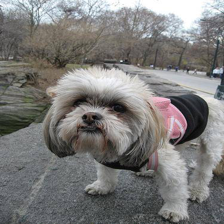

In [ ]:
img = Image.fromarray(x_train[0])
img

In [ ]:
labels_df = pd.read_csv('../content/dog-breed-identification/labels.csv')
samp_subm = pd.read_csv('../content/dog-breed-identification/sample_submission.csv')
print(f'The shape of the labels: {labels_df.shape}')

The shape of the labels: (10222, 2)


In [ ]:
X_train = prepare_data('../content/dog-breed-identification/train/', labels_df, image_size)
X_test = prepare_data('../content/dog-breed-identification/test/', samp_subm, image_size)

In [ ]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Encode the Labels

In [ ]:
y_train = labels_df['breed']
y_train = pd.get_dummies(y_train)

## Split Train Data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=2021)

In [ ]:
print('Shape train data:', X_train.shape)
print('Shape val data:', X_val.shape)

## Reshape Data

In [ ]:
X_train = X_train.reshape(-1,image_size,image_size,1)
X_val = X_val.reshape(-1,image_size,image_size,1)
X_test = X_test.reshape(-1,image_size,image_size,1)

In [ ]:
print('Shape train data:', X_train.shape)
print('Shape val data:', X_val.shape)

# Data Augmentation

In [ ]:
image_size = (128, 128)
batch_size = 32

train_df = tf.keras.preprocessing.image_dataset_from_directory(
    "../content/dog-breed-identification",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_df = tf.keras.preprocessing.image_dataset_from_directory(
    "../content/dog-breed-identification",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 20579 files belonging to 2 classes.
Using 16464 files for training.
Found 20579 files belonging to 2 classes.
Using 4115 files for validation.


#Baseline Model

In [ ]:
model=Sequential()

model.add(ZeroPadding2D((1,1),input_shape=(128,128,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(120,activation='softmax'))

model.compile(loss= 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_4 (ZeroPaddi  (None, 130, 130, 1)      0         
 ng2D)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 zero_padding2d_5 (ZeroPaddi  (None, 130, 130, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                      

In [ ]:
history=model.fit(X_train, y_train,
                
                       validation_data = (X_val, y_val),
                       validation_steps = 4,
                       epochs = 15,
                       verbose = 1)

Epoch 1/15
256/256 [==============================] - 7s 27ms/step - loss: 1.4833 - accuracy: 0.5573 - val_loss: 8.5841 - val_accuracy: 0.0220
Epoch 2/15
256/256 [==============================] - 7s 26ms/step - loss: 1.3991 - accuracy: 0.5776 - val_loss: 9.1502 - val_accuracy: 0.0249
Epoch 3/15
256/256 [==============================] - 7s 26ms/step - loss: 1.3879 - accuracy: 0.5835 - val_loss: 9.2096 - val_accuracy: 0.0244
Epoch 4/15
256/256 [==============================] - 7s 26ms/step - loss: 1.3455 - accuracy: 0.5926 - val_loss: 9.3237 - val_accuracy: 0.0215
Epoch 5/15
256/256 [==============================] - 7s 26ms/step - loss: 1.3016 - accuracy: 0.6074 - val_loss: 10.0973 - val_accuracy: 0.0308
Epoch 6/15
256/256 [==============================] - 7s 28ms/step - loss: 1.2509 - accuracy: 0.6216 - val_loss: 9.9971 - val_accuracy: 0.0293
Epoch 7/15
256/256 [==============================] - 7s 26ms/step - loss: 1.2158 - accuracy: 0.6299 - val_loss: 11.0380 - val_accuracy: 0.02

# Transfer Learning

## 1. Efficient Net

In [ ]:
from tensorflow.keras.applications import VGG19
from keras.models import Model
from keras.layers import Dense,Dropout
from keras.backend import pool2d
from keras.layers.pooling import GlobalAveragePooling2D

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3
def create_model():
    model = models.Sequential()
    model.add(EfficientNetB3(include_top = False, weights = 'imagenet',
                             input_shape = (128, 128, 3),  drop_connect_rate=0.3))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(120, activation='softmax'))
    
    loss = tf.keras.losses.CategoricalCrossentropy(
        label_smoothing=0.0001,
        name='categorical_crossentropy'
    )
    model.compile(optimizer = Adam(lr = 1e-4),
                  loss = loss,
                  metrics = ["categorical_accuracy"])
    return model

model = create_model()
model.summary()

43941136/43941136 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 4, 4, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               30

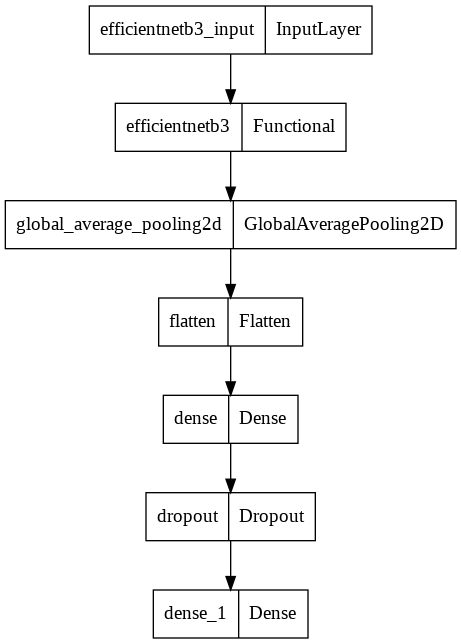

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
epochs = 50
batch_size = 32


callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)

model_history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    callbacks = [callback])

Epoch 1/50
256/256 [==============================] - 53s 206ms/step - loss: 0.0744 - categorical_accuracy: 0.9790 - val_loss: 5.9080 - val_categorical_accuracy: 0.0538
Epoch 2/50
256/256 [==============================] - 56s 219ms/step - loss: 0.0763 - categorical_accuracy: 0.9795 - val_loss: 5.3537 - val_categorical_accuracy: 0.1227
Epoch 3/50
256/256 [==============================] - 53s 208ms/step - loss: 0.0715 - categorical_accuracy: 0.9812 - val_loss: 5.6176 - val_categorical_accuracy: 0.0186
Epoch 4/50
256/256 [==============================] - 56s 218ms/step - loss: 0.0716 - categorical_accuracy: 0.9810 - val_loss: 5.7703 - val_categorical_accuracy: 0.0494
Epoch 5/50
256/256 [==============================] - 54s 209ms/step - loss: 0.0650 - categorical_accuracy: 0.9813 - val_loss: 6.9408 - val_categorical_accuracy: 0.0073


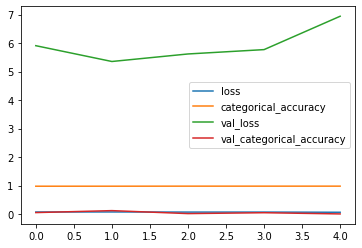

In [ ]:
pd.DataFrame(model_history.history).plot()

# Plot Between Accuracy & Loss

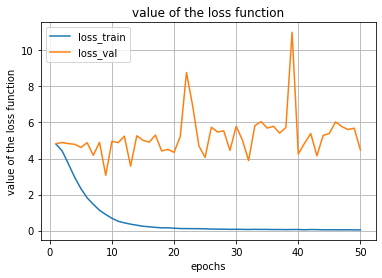

In [ ]:
loss = model_history.history['loss']
loss_val = model_history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, label='loss_train')
plt.plot(epochs, loss_val, label='loss_val')
plt.title('value of the loss function')
plt.xlabel('epochs')
plt.ylabel('value of the loss function')
plt.legend()
plt.grid()
plt.show()

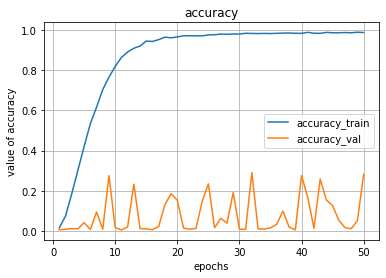

In [ ]:
acc = model_history.history['categorical_accuracy']
acc_val = model_history.history['val_categorical_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, label='accuracy_train')
plt.plot(epochs, acc_val,  label='accuracy_val')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('value of accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

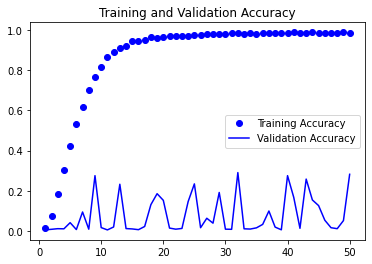

In [ ]:
import matplotlib.pyplot as plt
train_acc = model_history.history["categorical_accuracy"]
val_acc = model_history.history["val_categorical_accuracy"]
epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

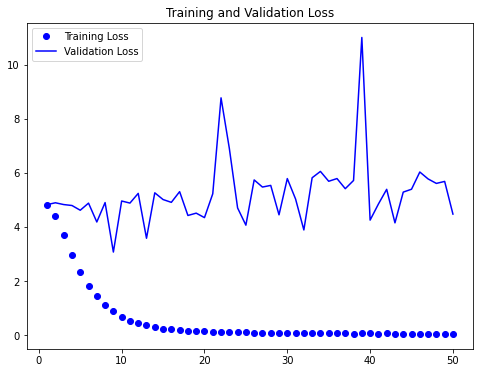

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
train_loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
epochs = range(1, len(train_loss)+1)
plt.plot(epochs, train_loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()